In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Solución analítica del ptoblema
def analitica(g, m, alpha, t):

    return (m * g / alpha) * (1 - np.exp(-t * alpha / m))

# Ecuación diferencial
def dvdt(g, alpha, m, v):
    return g  - alpha * v / m

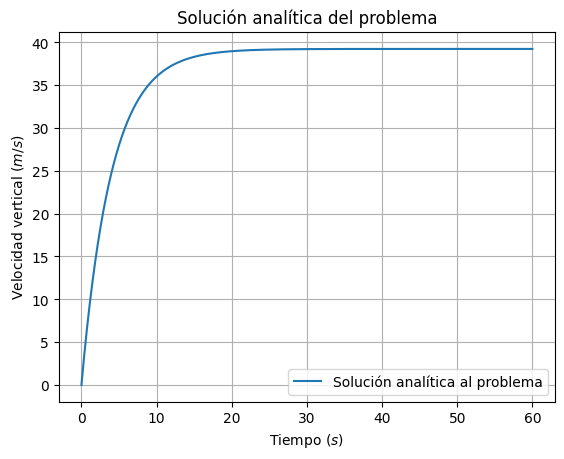

In [6]:
# Parámetros físicos del problema
g = 9.81
m = 60
alpha = 15
t0 = 0
tf = 60
v0 = 0
n = 500

# Creando vector de tiempos y graficnado solución analítica
T = np.linspace(t0, tf, n)
V = analitica(g, m, alpha, T)

plt.plot(T, V, label='Solución analítica al problema')
plt.xlabel(r'Tiempo $(s)$')
plt.ylabel(r'Velocidad vertical $(m / s)$')
plt.title('Solución analítica del problema')
plt.grid()
plt.legend()

/tmp/ipykernel_508343/2424017007.py:20: RuntimeWarning: invalid value encountered in divide
  errorEuler = np.abs((Ve - Va) / Va)
/tmp/ipykernel_508343/2424017007.py:37: RuntimeWarning: invalid value encountered in divide
  errorHeun = np.abs((Vh - Va) / Va)
/tmp/ipykernel_508343/2424017007.py:49: RuntimeWarning: invalid value encountered in divide
  errorPm = np.abs((Vpm - Va) / Va)
/tmp/ipykernel_508343/2424017007.py:63: RuntimeWarning: invalid value encountered in divide
  errorRK3 = np.abs((Vrk3 - Va) / Va)
/tmp/ipykernel_508343/2424017007.py:78: RuntimeWarning: invalid value encountered in divide
  errorRK4 = np.abs((Vrk4 - Va) / Va)


Text(0, 0.5, 'Eror relativo')

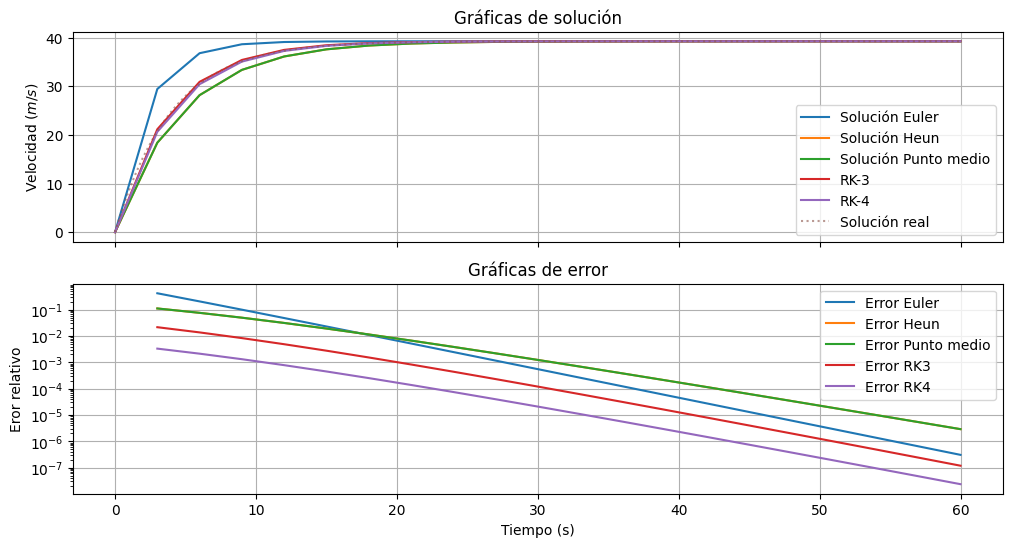

In [41]:
# Soluciones numéricas
dt = 3

# Tiempos para analísis
pasos = int((tf - t0) / dt + 1)
Tn = np.linspace(t0, tf, pasos)

# Calcular la solución analítica en los pasos escogido
Va = analitica(g, m, alpha, Tn)

# Solución por Euler
Ve = np.empty_like(Tn)
Ve[0] = v0

# Iterar para hallar solución
for t in range(1, len(Tn)):

    Ve[t] = Ve[t - 1] + dt * dvdt(g, alpha, m, Ve[t - 1])

errorEuler = np.abs((Ve - Va) / Va)

# Solucion por Heun
Vh = np.empty_like(Tn)
Vh[0] = v0

# Iterar buscando solución
for t in range(1, len(Tn)):

    pend0 = dvdt(g, alpha, m, Vh[t - 1])
    pred = Vh[t - 1] + dt * pend0
    pend1 = dvdt(g, alpha, m, pred)

    pend_promedio = 0.5 * (pend0 + pend1)

    Vh[t] = Vh[t - 1] + dt * pend_promedio

errorHeun = np.abs((Vh - Va) / Va)    

# Método del punto medio
Vpm = np.empty_like(Tn)
Vpm[0]  = v0

for t in range(1, len(Tn)):

    v05 = Vpm[t - 1] + (dt / 2) * dvdt(g, alpha, m, Vpm[t - 1])
    pend = dvdt(g, alpha, m, v05)
    Vpm[t] = Vpm[t - 1] + dt * pend

errorPm = np.abs((Vpm - Va) / Va)

# Runge-Kutta 3
Vrk3 = np.empty_like(Tn)
Vrk3[0] = v0

for t in range(1, len(Tn)):

    k1 = dvdt(g, alpha, m, Vrk3[t - 1])
    k2 = dvdt(g, alpha, m, Vrk3[t - 1] + 0.5 * dt * k1)
    k3 = dvdt(g, alpha, m, Vrk3[t - 1] - dt * k1 + 2 * dt * k2)

    Vrk3[t] = Vrk3[t - 1] + (1 / 6) * (k1 + 4 * k2 + k3) * dt

errorRK3 = np.abs((Vrk3 - Va) / Va)

# Runge-Kutta 4
Vrk4 = np.empty_like(Tn)
Vrk4[0] = v0

for t in range(1, len(Tn)):

    k1 = dvdt(g, alpha, m, Vrk4[t - 1])
    k2 = dvdt(g, alpha, m, Vrk4[t - 1] + 0.5 * k1 * dt)
    k3 = dvdt(g, alpha, m, Vrk4[t - 1] + 0.5 * k2 * dt)
    k4 = dvdt(g, alpha, m, Vrk4[t - 1] + k3 * dt)

    Vrk4[t] = Vrk4[t - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * dt 

errorRK4 = np.abs((Vrk4 - Va) / Va)

# Graficar
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(12, 6))

ax[0].plot(Tn, Ve, label='Solución Euler')
ax[0].plot(Tn, Vh, label='Solución Heun')
ax[0].plot(Tn, Vpm, label='Solución Punto medio')
ax[0].plot(Tn, Vrk3, label='RK-3')
ax[0].plot(Tn, Vrk4, label='RK-4')
ax[0].plot(T, V, ls=':', alpha=0.6, label='Solución real')
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel(r'Velocidad $(m/s)$')
ax[0].set_title('Gráficas de solución')

ax[1].semilogy(Tn, errorEuler, label='Error Euler')
ax[1].semilogy(Tn, errorHeun, label='Error Heun')
ax[1].semilogy(Tn, errorPm, label='Error Punto medio')
ax[1].semilogy(Tn, errorRK3, label='Error RK3')
ax[1].semilogy(Tn, errorRK4, label='Error RK4')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Gráficas de error')
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_ylabel('Eror relativo')